# D207- Exploratory Data Analysis
___
## Performance Assessment - Task 1: Exploratory Data Analysis OEM2
### Medical Readmission Data Set (Clean)
---
<br></br>

### A1: Question for Analysis

Is the initial length of a patient's hospital stay (Initial_days) related to the likelihood of that patient to be readmitted? 


### A2: Benefit from Analysis

Analyzing these data for patterns and trends would allow the company and its stakeholders to more accurately predict the probability of a patient being readmitted. Furthermore, gaining additional insight and intelligence into the potential outcomes would enable the organization to better predict both the associated cost and resources required by their facilities as well as the potential fines if they are unable to meet the standards required by CMS.

### A3: Data Identification

The relevant data from the medical_clean.csv dataset required to interrogate the question above include the "Initial_days" and "ReAdmis" variables. These two should be all we need to answer the question of whether or not the initial length of a patient's hospital stay is predictive of their probability of readmission.

### B1 & B2: Code & Output
___


In [1]:
# load in all libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# read in dataset and sub-select necessary variables
df_b = pd.read_csv('./data/medical_clean.csv', 
                   usecols=['Initial_days', 
                            'ReAdmis'])


# two-sample t-test

# create groups readmitted yes/no with length of initial hospitalization 
readmit_yes = df_b[df_b['ReAdmis'] == 'Yes'].Initial_days
readmit_no = df_b[df_b['ReAdmis'] == 'No'].Initial_days

# set t-test and print raw result
ttest_result = stats.ttest_ind(readmit_yes, 
                               readmit_no)
print(ttest_result)

# if t-test p-value is less than alpha (.05), reject null hypothesis, else do not reject
alpha = .05
if (ttest_result[1] < alpha):
    print(f'T-Test p-value returned as: {str(ttest_result[1])} with an alpha of {str(alpha)}. \nP-value falls within .05 alpha: \nReject the null hypothesis.')
else:
    print(f'T-Test p-value returned as: {str(ttest_result[1])} with an alpha of {str(alpha)}. \nP-value does not fall within .05 alpha: \nAccept the null hypothesis.')
        

Ttest_indResult(statistic=161.9324105776643, pvalue=0.0)
T-Test p-value returned as: 0.0 with an alpha of 0.05. 
P-value falls within .05 alpha: 
Reject the null hypothesis.


<AxesSubplot:xlabel='Initial_days', ylabel='ReAdmis'>

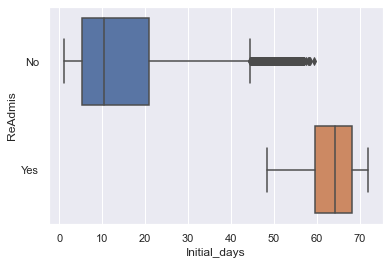

In [89]:
# visualization of relationship between initial days hospitalized and readmission yes/no
sns.boxplot(y='ReAdmis', 
            x='Initial_days', 
            data=df_b)

### B3: Justification

Due to the alternative hypothesis, namely, that there is a statistically significant link between the initial length of a pateint's hospitalization and that patient's probability of being readmitted, necessitating the analysis of one continuous variable (Initial_days) and one binary, categorical variable (ReAdmis), a t-test seemed the logical choice. As t-tests were initially designed to do simple A/B testing comparing two groups of the same sample to identify whether or not the two groups are different enough to warrant further investigation, I believe it works very well for our purposes here. ***CITE***

### C: Univariate Statistics

For our visualization of two continuous variables, we will look at the distributions of observed patient vitamin D levels (VitD_levels) as well as the initial length of time (in days) paient's were hospitalized for (Initial_days).

For our visualization of two categorical variables, we will look at the binary distributions of whether or not (yes/no) a patient was readmitted after initial hospitalization (ReAdmis) as well as whether or not (yes/no) a patient was identified as having high blood pressure (HighBlood).

#### Identifying **continuous** variable distributions

The distribution of initial length of hospitalization is actually **bimodal**, or **"U-shaped"**, as indicated by the two peaks.

The distribution of vitamin D levels is a **normal distribution**.


#### Identifying **categorical** variable distributions

The distribution of patient readmission is a **Bernoulli distribution** (due to its binary nature).

The distribution of whether or not a patient has high blood pressure is also a **Bernoulli distribution** (due to its binary nature).

### C1: Visual of Findings

In [43]:
# create new table for univariate stats
df_c = pd.read_csv('./data/medical_clean.csv',
                usecols=['VitD_levels', 
                         'Initial_days',
                         'ReAdmis',
                         'HighBlood'])

#### Continuous Variables

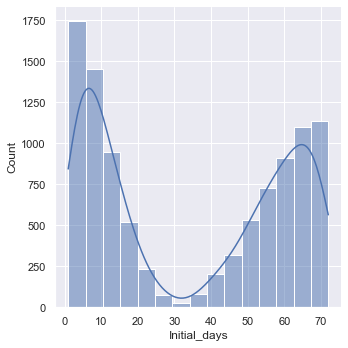

In [51]:
# plot distribution of Initial_days
sns.displot(df_c.Initial_days, 
            kde=True)

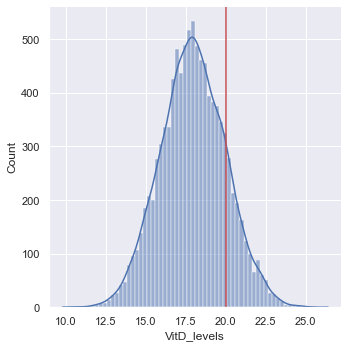

In [52]:
# plot distribution of VitD_levels
# red vertical line indicates the generally accepted minimum Vit D threshold of 20ng/mL
sns.displot(df_c.VitD_levels, 
            kde=True)
plt.axvline(20, 
            color='r')

#### Categorical Variables

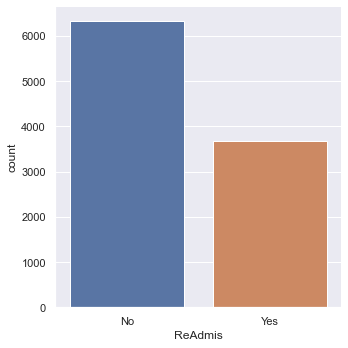

In [48]:
# plot distribution of ReAdmis
sns.catplot(x='ReAdmis', 
            kind='count', 
            data=df_c)

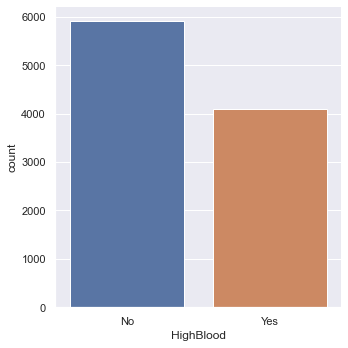

In [50]:
# plot distribution of HighBlood
sns.catplot(x='HighBlood', 
            kind='count', 
            data=df_c, 
            order=['No', 
                   'Yes'])

### D: Bivariate Statistics

For our visualization of two continuous variables, we will again visualize observed patient vitamin D levels (VitD_levels) as well as the initial length of time (in days) paient's were hospitalized for (Initial_days). This time, we will see if there is an observable correlation between the two.

For our visualization of two categorical variables, we will look again at patients who were readmitted after initial hospitalization (ReAdmis) and whether or not (yes/no) a patient was identified as having high blood pressure (HighBlood).

### D1: Visual of Findings

<AxesSubplot:xlabel='Initial_days', ylabel='VitD_levels'>

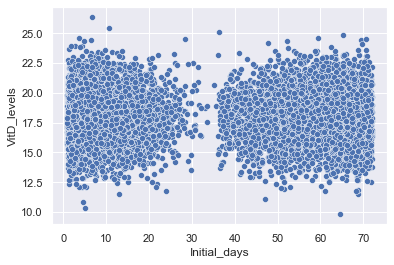

In [86]:
# scatter plot to check for correlation between VitD_levels and Initial_days
sns.scatterplot(x='Initial_days', 
                y='VitD_levels', 
                data=df_c)

Text(0.5, 0, 'Readmitted Patients w/ High Blood Pressure')

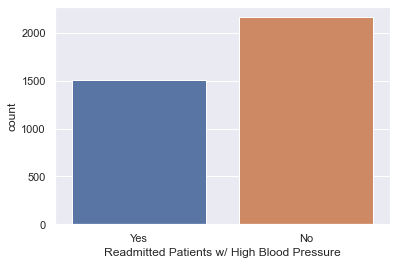

In [81]:
# plot only readmitted patients with yes/no high blood pressure
sns.countplot(x=df_c[df_c.ReAdmis == 'Yes'].HighBlood)
plt.xlabel('Readmitted Patients w/ High Blood Pressure')

### E1: Results of Analysis

Our initial question was to explore whether or not we could find a statistically significantly relation between a patient's initial length of hospitalization and their probability of being readmitted. The null hypothesis was that there is no statistically significant diffence in distribution of initial length of hospitalization in patients who were readmitted versus patients who were not readmitted. The alternative hypothesis was that there is a statistically significant difference. In order to analyze this relationship, we used a t-test with an alpha of 5%. This test showed that there was enough difference between two groups of the sample to reject the null hypothesis. Additionally, a simple visualization was added for ease of conceptualization showing comparative boxplots of pateints who were readmitted or not. The difference seen in this visualization is quite clear, the two groups are very different.

### E2: Limitations of Analysis

Although a t-test is an excellent first step in exploratory data analysis, one cannot infer much from the result, other than whether the hypothesis is worth exploring further. Additionally, the limited analysis performed here does not take into consideration the effects of confounding variables. In essence, there are likely "unknown unknowns" that are both related to the metrics observed and also influential on the outcome that we are unable to assess at this point.

### E3: Recommended Course of Action

As mentioned above, the results of analysis are preliminary in nature and simply indicate the need for additional exploration and analysis in order to add supporting evidence to the rejection of our null hypothesis. Should we wish to further explore the relationship between length of hospitalization and readmission, there are additional, deeper analyses as well as analytics we could perfom on these data to gain further insight and help decision-makers become better-informed in their decision making.

### H: Sources
